In [1]:
import wikipedia

In [10]:
x = wikipedia.summary("Wikipedia")
print x.encode('ascii', 'ignore')

Wikipedia (/wkpidi/ or /wkipidi/ WIK-i-PEE-dee-) is a free-access, free-content Internet encyclopedia, supported and hosted by the non-profit Wikimedia Foundation. Those who can access the site can edit most of its articles. Wikipedia is ranked among the ten most popular websites, and constitutes the Internet's largest and most popular general reference work.
Jimmy Wales and Larry Sanger launched Wikipedia on January 15, 2001. Sanger coined its name, a portmanteau of wiki and encyclopedia. Initially only in English, Wikipedia quickly became multilingual as it developed similar versions in other languages, which differ in content and in editing practices. The English Wikipedia is now one of 291 Wikipedia editions and is the largest with 5,118,564 articles (having reached 5,000,000 articles in November 2015). There is a grand total, including all Wikipedias, of over 38 million articles in over 250 different languages. As of February 2014, it had 18 billion page views and nearly 500 milli

In [1]:
import pandas as pd

In [16]:
dataset = pd.read_table('C:\Users\JareD\Major Project\EvenSem\Data\DataSet.tsv')
positive_df = pd.read_table('C:\Users\JareD\Major Project\EvenSem\Data\Positive_DataSet.tsv')

In [36]:
dataset.count()

Unnamed: 0       29196
QuestionID       29196
Question         29196
DocumentID       29196
DocumentTitle    29196
SentenceID       29196
Sentence         29196
Label            29196
Type             29196
dtype: int64

In [17]:
documents_df = dataset[['DocumentID', 'SentenceID', 'Sentence']]

In [45]:
dataset[dataset['Type'] == 'train'].head(15)

,Unnamed: 0,QuestionID,Question,DocumentID,DocumentTitle,SentenceID,Sentence,Label,Type
0,0,Q1,how are glacier caves formed?,D1,Glacier cave,D1-0,A partly submerged glacier cave on Perito More...,0,train
1,1,Q1,how are glacier caves formed?,D1,Glacier cave,D1-1,The ice facade is approximately 60 m high,0,train
2,2,Q1,how are glacier caves formed?,D1,Glacier cave,D1-2,Ice formations in the Titlis glacier cave,0,train
3,3,Q1,how are glacier caves formed?,D1,Glacier cave,D1-3,A glacier cave is a cave formed within the ice...,1,train
4,4,Q1,how are glacier caves formed?,D1,Glacier cave,D1-4,"Glacier caves are often called ice caves , but...",0,train
5,5,Q2,How are the directions of the velocity and for...,D2,Circular motion,D2-0,"In physics , circular motion is a movement of ...",0,train
6,6,Q2,How are the directions of the velocity and for...,D2,Circular motion,D2-1,"It can be uniform, with constant angular rate ...",0,train
7,7,Q2,How are the directions of the velocity and for...,D2,Circular motion,D2-2,The rotation around a fixed axis of a three-di...,0,train
8,8,Q2,How are the directions of the velocity and for...,D2,Circular motion,D2-3,The equations of motion describe the movement ...,0,train
9,9,Q2,How are the directions of the velocity and for...,D2,Circular motion,D2-4,Examples of circular motion include: an artifi...,0,train


In [43]:
documents_df.to_csv("C:\Users\JareD\Major Project\EvenSem\Data\Documents_Sentences.tsv", sep = '\t')

In [4]:
documents_df.head(15)

,DocumentID,SentenceID,Sentence
0,D1,D1-0,A partly submerged glacier cave on Perito More...
1,D1,D1-1,The ice facade is approximately 60 m high
2,D1,D1-2,Ice formations in the Titlis glacier cave
3,D1,D1-3,A glacier cave is a cave formed within the ice...
4,D1,D1-4,"Glacier caves are often called ice caves , but..."
5,D2,D2-0,"In physics , circular motion is a movement of ..."
6,D2,D2-1,"It can be uniform, with constant angular rate ..."
7,D2,D2-2,The rotation around a fixed axis of a three-di...
8,D2,D2-3,The equations of motion describe the movement ...
9,D2,D2-4,Examples of circular motion include: an artifi...


In [55]:
import numpy as np
x = [[1, 2], [3, 4]]
np.array(np.array(x))[:, 1]

array([2, 4])

In [74]:
documents_df[documents_df['SentenceID'] == 'D2-0']['Sentence'].values[0]

'In physics , circular motion is a movement of an object along the circumference of a circle or rotation along a circular path.'

In [3]:
import pandas as pd
import string, re

def preprocess(inputString):
    inputString = inputString.lower()
    inputString = re.sub('[%s]' % re.escape(string.punctuation), '', inputString)
    inputString = ' '.join(inputString.replace("'s", '').split())
    return re.sub( '\s+', ' ', inputString).strip()

def getDocuments():
    documents_df = pd.read_table("C:\Users\JareD\Major Project\EvenSem\Data\Documents_Sentences.tsv")
    document_ids = documents_df['DocumentID'].unique()
    print len(document_ids)
    document_content = []
    for document_id in document_ids:
        content = ""
        document_df = documents_df[documents_df['DocumentID'] == document_id]
        sentences = document_df['Sentence'].values
        for sentence in sentences:
            content = content + " " + sentence
        content = preprocess(content)
        document_content.append(content)    
    return document_content

In [4]:
document_content = getDocuments()

2808


In [2]:
documents_df = pd.read_table("C:\Users\JareD\Major Project\EvenSem\Data\Documents_Sentences.tsv")

In [7]:
documents_content = zip(documents_df['DocumentID'].unique(), document_content)

In [8]:
documents_content = np.array(documents_content)

In [9]:
documents_content_df = pd.DataFrame(documents_content, columns = ['DocumentID', 'Content'])

In [10]:
documents_content_df.to_csv("C:\Users\JareD\Major Project\EvenSem\Data\Documents_Content.tsv", sep = '\t')

In [12]:
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3

In [3]:
documents_content_df = pd.read_table("C:\Users\JareD\Major Project\EvenSem\Data\Documents_Content.tsv")

In [5]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [21]:
totalvocab_stemmed = []
totalvocab_tokenized = []
documents_content = documents_content_df['Content']
documents_id = documents_content_df['DocumentID']


In [8]:
import pickle
vocabulary = pickle.load(open("C:\Users\JareD\Major Project\EvenSem\Models\IR\Tfidf_Vocabulary.pkl", "rb"))
stemmer = SnowballStemmer("english")

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

documents_content = documents_content_df['Content']

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(stop_words='english', tokenizer = tokenize_and_stem, vocabulary = vocabulary)

%time tfidf_matrix = tfidf_vectorizer.fit_transform(documents_content) #fit the vectorizer to synopses

print(tfidf_matrix.shape)

Wall time: 15.4 s
(2808, 26487)


In [14]:
terms = tfidf_vectorizer.get_feature_names()
len(terms)

C:\Users\JareD\Anaconda2\lib\site-packages\IPython\core\formatters.py:90: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
C:\Users\JareD\Anaconda2\lib\site-packages\IPython\core\formatters.py:96: DeprecationWarning: DisplayFormatter._formatters_default is deprecated: use @default decorator instead.
  def _formatters_default(self):
C:\Users\JareD\Anaconda2\lib\site-packages\IPython\core\formatters.py:675: DeprecationWarning: PlainTextFormatter._deferred_printers_default is deprecated: use @default decorator instead.
  def _deferred_printers_default(self):
C:\Users\JareD\Anaconda2\lib\site-packages\IPython\core\formatters.py:667: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):
C:\Users\JareD\Anaconda2\lib\site-packages\IPython\core\formatters.py:670: DeprecationWarn

26487

In [93]:
tokens = nltk.word_tokenize(documents_content[2])
print len(tokens)
count = 0
for token in tokens:
    try:
        if stemmer.stem(token) in terms:
            #print stemmer.stem(token)
            count += 1
        elif token in stopwords:
            count += 1
        else:
            print stemmer.stem(token)
    except:
        print 1
print count

174
15
15
12
1987
3rd
4th
5th
1
166


In [87]:
#Get Vocabulary
vocabulary = []
for document_content in documents_content:
    tokens = nltk.word_tokenize(document_content)
    filtered_tokens = []
    for token in tokens:
        if token.isalpha():
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    vocabulary.extend(stems)
    vocabulary = list(set(vocabulary))

In [63]:
len(vocabulary)

26487

In [78]:
"part" in vocabulary

True

In [29]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

In [15]:
documents_sentences_df = pd.read_table("C:\Users\JareD\Major Project\EvenSem\Data\Documents_Sentences.tsv")
documents_clusters_df = pd.read_table("C:\Users\JareD\Major Project\EvenSem\Data\Documents_Clusters.tsv")
tfidf_vocabulary = pickle.load(open("C:\Users\JareD\Major Project\EvenSem\Models\IR\Tfidf_Vocabulary.pkl", "rb"))
tfidf_matrix = pickle.load(open("C:\Users\JareD\Major Project\EvenSem\Models\IR\Tfidf_Matrix.pkl", "rb"))
km = pickle.load(open("C:\Users\JareD\Major Project\EvenSem\Models\IR\KMeans.pkl", "rb"))
stemmer = SnowballStemmer("english")

In [16]:
from sklearn.cluster import KMeans
from sklearn import metrics

num_clusters = 15

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_
silhouette_score = metrics.silhouette_score(tfidf_matrix, clusters)
print silhouette_score

Wall time: 5.72 s
0.00748178810468


In [17]:
from sklearn import metrics

silhouette_scores = []
for num_clusters in range(5, 20):
    km = KMeans(n_clusters=num_clusters)
    cluster_labels = km.fit_predict(tfidf_matrix)
    silhouette_score = metrics.silhouette_score(tfidf_matrix, cluster_labels)
    silhouette_scores.append(silhouette_score)
    print num_clusters, silhouette_score

5 0.00633442853631
6 0.00630942891887
7 0.00583977839792
8 0.0072519763563
9 0.00699450758344
10 0.00703367111455
11 0.00644771661583
12 0.00690957039641
13 0.00647010069969
14 0.00734067671023
15 0.00866133535204
16 0.00826131322643
17 0.00791106380009
18 0.0082516382287
19 0.00755138746029


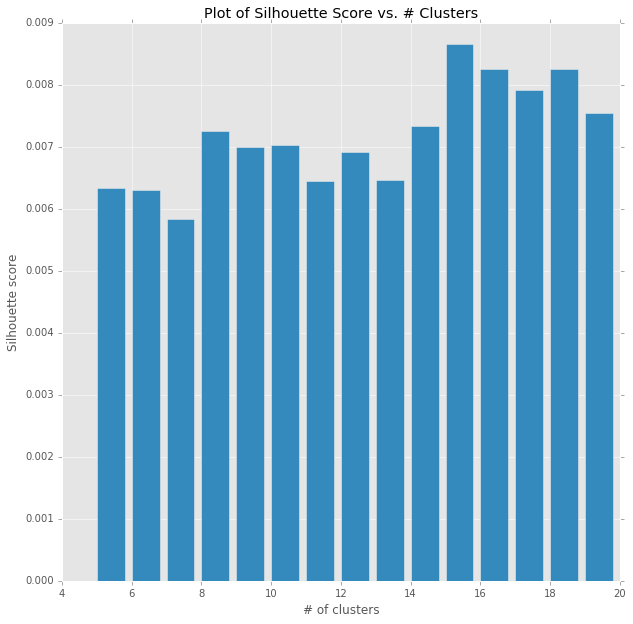

In [28]:
number_of_clusters = [x for x in range(5, 20)]

import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

plt.figure(figsize = (10, 10))
plot = plt.bar(number_of_clusters, silhouette_scores)
plt.title("Plot of Silhouette Score vs. # Clusters")
plt.xlabel("# of clusters")
plt.ylabel("Silhouette score")

In [135]:
number_of_clusters = [x for x in range(5, 30)]
lst = zip(number_of_clusters, silhouette_scores)
lst = np.array(lst)
lst = lst[np.argsort(lst[:, 1])]
lst = lst[::-1]
print lst

[[  2.60000000e+01   9.78239093e-03]
 [  2.70000000e+01   9.23732788e-03]
 [  2.40000000e+01   8.86752917e-03]
 [  2.20000000e+01   8.83286868e-03]
 [  2.30000000e+01   8.67993561e-03]
 [  2.90000000e+01   8.49643272e-03]
 [  2.80000000e+01   8.49114172e-03]
 [  1.90000000e+01   8.41684749e-03]
 [  1.50000000e+01   8.21749370e-03]
 [  2.00000000e+01   8.07777847e-03]
 [  1.20000000e+01   7.88798415e-03]
 [  1.70000000e+01   7.87984723e-03]
 [  1.10000000e+01   7.87234078e-03]
 [  1.40000000e+01   7.83328784e-03]
 [  2.50000000e+01   7.77499811e-03]
 [  1.80000000e+01   7.73798979e-03]
 [  1.30000000e+01   7.63121556e-03]
 [  1.60000000e+01   7.31875512e-03]
 [  9.00000000e+00   7.18831557e-03]
 [  2.10000000e+01   7.06620544e-03]
 [  1.00000000e+01   6.72498916e-03]
 [  8.00000000e+00   6.42040616e-03]
 [  6.00000000e+00   6.28594389e-03]
 [  7.00000000e+00   6.21566890e-03]
 [  5.00000000e+00   5.81974828e-03]]


In [ ]:
count(clusters)

In [172]:
document_clusters = {'DocumentID' : documents_id, 'Cluster' : clusters  }

document_clusters_df = pd.DataFrame(document_clusters, columns = ['DocumentID', 'Cluster'])
document_clusters_df.to_csv("C:\Users\JareD\Major Project\EvenSem\Data\Documents_Clusters.tsv", sep = '\t')

In [173]:
document_clusters_df.head()

,DocumentID,Cluster
0,D1,8
1,D2,8
2,D5,2
3,D6,4
4,D7,8


In [192]:
import pickle

pickle.dump(tfidf_vectorizer, open("C:\Users\JareD\Major Project\EvenSem\Models\IR\Tfidf_Vectorizer.pkl", "wb"))
pickle.dump(km, open("C:\Users\JareD\Major Project\EvenSem\Models\IR\KMeans.pkl", "wb")) 
pickle.dump(tfidf_matrix, open("C:\Users\JareD\Major Project\EvenSem\Models\IR\Tfidf_Matrix.pkl", "wb")) 
pickle.dump(tfidf_vectorizer.get_feature_names(), open("C:\Users\JareD\Major Project\EvenSem\Models\IR\Tfidf_Vocabulary.pkl", "wb")) 

In [200]:
from nltk.stem.snowball import SnowballStemmer

documents_sentences_df = pd.read_table("C:\Users\JareD\Major Project\EvenSem\Data\Documents_Sentences.tsv")
documents_clusters_df = pd.read_table("C:\Users\JareD\Major Project\EvenSem\Data\Documents_Clusters.tsv")
tfidf_vocabulary = pickle.load(open("C:\Users\JareD\Major Project\EvenSem\Models\IR\Tfidf_Vocabulary.pkl", "rb"))
tfidf_matrix = pickle.load(open("C:\Users\JareD\Major Project\EvenSem\Models\IR\Tfidf_Matrix.pkl", "rb"))
km = pickle.load(open("C:\Users\JareD\Major Project\EvenSem\Models\IR\KMeans.pkl", "rb"))
stemmer = SnowballStemmer("english")

def preprocess(inputString):
    inputString = inputString.lower()
    inputString = re.sub('[%s]' % re.escape(string.punctuation), '', inputString)
    inputString = ' '.join(inputString.replace("'s", '').split())
    return re.sub( '\s+', ' ', inputString).strip()

def queryVectorize(question):
    tokens = nltk.word_tokenize(question)
    queryTf = [stemmer.stem(token) for token in tokens]
    
    terms = tfidf_vocabulary
    tfVector = [0 for i in range(len(terms))]
    for term in queryTf:
        if term in terms:
            tfVector[terms.index(term)] = tfVector[terms.index(term)] + 1
            #print term
        #else:
            #print "----", term
    return np.array(tfVector)

def retrieveDocuments(question):
    question = preprocess(question)
    #print question
    question_vector = queryVectorize(question)
    #print question_vector
    cosine_similarities_clusters = cosine_similarity(question_vector.reshape(1, -1), km.cluster_centers_)[0]
    cosine_similarities_documents = cosine_similarity(question_vector.reshape(1, -1), tfidf_matrix)[0]
    documents_id = document_clusters_df['DocumentID']
    ranked_list = zip(documents_id, cosine_similarities_documents)
    ranked_list = np.array(ranked_list)
    ranked_list = ranked_list[np.argsort(ranked_list[:, 1])]
    ranked_list = ranked_list[::-1]
    retrieved_documents = list(ranked_list[:, 0][:5]) 
    print retrieved_documents
    return retrieved_documents

def loadDataset(question):
    retrieved_documents = retrieveDocuments(question)
    print retrieved_documents
    return documents_sentences_df[documents_sentences_df['DocumentID'].isin(retrieved_documents)]

loadDataset("How are you feeling today?")

['D468', 'D2724', 'D1283', 'D2293', 'D1949']
['D468', 'D2724', 'D1283', 'D2293', 'D1949']


,Unnamed: 0,DocumentID,SentenceID,Sentence
3391,3391,D468,D468-0,Self-esteem is a term used in psychology to re...
3392,3392,D468,D468-1,It is a judgement of oneself as well as an att...
3393,3393,D468,D468-2,"Self-esteem encompasses beliefs (for example, ..."
3394,3394,D468,D468-3,"Smith and Mackie define it by saying ""The self..."
3395,3395,D468,D468-4,Self-esteem is also known as the evaluative di...
3396,3396,D468,D468-5,One's self-esteem is also closely associated w...
3397,3397,D468,D468-6,Self-esteem is a disposition that a person has...
3398,3398,D468,D468-7,"In the mid-1960s, Morris Rosenberg and social-..."
3399,3399,D468,D468-8,Nathaniel Branden in 1969 defined self-esteem ...
3400,3400,D468,D468-9,"According to Branden, self-esteem is the sum o..."


In [168]:
a = [3, 4 , 2, 1, 5, 6, 7]
sorted(range(len(a)), key=lambda i: a[i])[-4:]

[1, 4, 5, 6]

In [181]:
document_clusters_df['Cluster'].value_counts()

440

In [185]:
x = np.array([[1, 2], [3, 4]])
x[:, 0][:2]

array([1, 3])

In [191]:
documents_sentences_df[documents_sentences_df['DocumentID'].isin(['D0', 'D1'])]

,Unnamed: 0,DocumentID,SentenceID,Sentence
0,0,D1,D1-0,A partly submerged glacier cave on Perito More...
1,1,D1,D1-1,The ice facade is approximately 60 m high
2,2,D1,D1-2,Ice formations in the Titlis glacier cave
3,3,D1,D1-3,A glacier cave is a cave formed within the ice...
4,4,D1,D1-4,"Glacier caves are often called ice caves , but..."
20347,20347,D0,D0-0,African immigration to the United States refer...
20348,20348,D0,D0-1,The term African in the scope of this article ...
20349,20349,D0,D0-2,From the Immigration and Nationality Act of 19...
20350,20350,D0,D0-3,African immigrants in the United States come f...
20351,20351,D0,D0-4,"They include people from different national, l..."


In [193]:
document_clusters

{'Cluster': array([ 8,  8,  2, ..., 11,  8, 14]), 'DocumentID': 0          D1
 1          D2
 2          D5
 3          D6
 4          D7
 5          D9
 6         D10
 7         D12
 8         D13
 9         D14
 10        D15
 11        D16
 12        D17
 13        D18
 14        D19
 15        D21
 16        D22
 17        D23
 18        D24
 19        D25
 20        D26
 21        D27
 22        D28
 23        D29
 24        D30
 25        D31
 26        D32
 27        D34
 28        D35
 29        D36
         ...  
 2778    D2498
 2779    D2513
 2780    D2526
 2781    D2533
 2782    D2549
 2783    D2556
 2784    D2558
 2785    D2574
 2786    D2577
 2787    D2578
 2788    D2581
 2789    D2583
 2790    D2585
 2791    D2626
 2792    D2632
 2793    D2635
 2794    D2653
 2795    D2698
 2796    D2699
 2797    D2710
 2798    D2721
 2799    D2732
 2800    D2735
 2801    D2737
 2802    D2743
 2803    D2747
 2804    D2751
 2805    D2763
 2806    D2768
 2807    D2785
 Name: DocumentID, dty

In [203]:
x = [1, 2, 3, 4, 7, 6, 7]
x.index(max(x))

4

In [30]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()

KeyboardInterrupt: 

In [31]:
documents_clusters_df.head()

,Unnamed: 0,DocumentID,Cluster
0,0,D1,8
1,1,D2,8
2,2,D5,2
3,3,D6,4
4,4,D7,8


In [2]:
import pandas as pd
df = pd.read_table("C:\Users\JareD\Major Project\EvenSem\Data\DataSet_Feature_Extraction_3.tsv")

In [9]:
row = df.head(1)
for column in df.columns:
    print column + "\t\t" + row[column]
    

TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('S21') dtype('S21') dtype('S21')

Unnamed: 0
AntonymCount
BigramCount
HypernymCount
HyponymCount
IDFUnigramCount
Label
LemmaCount
LevenshteinEditDistance
NegativeSimilarity
PositiveSimilarity
Question
QuestionID
QuestionType
Sentence
SentenceID
SynonymCount
TrigramCount
Type
UnigramCount
